In [1]:
import scvelo as scv
import cellrank as cr
import scanpy as scp
import pickle
import numpy as np
from os.path import exists
import collections
import warnings
import random
random.seed(42)
warnings.filterwarnings('ignore')

In [2]:
adata = scv.read("all.h5ad")

In [3]:
adata = adata[adata.obs['sample'].isin(['N1KO D10','N1KO D14','WT D10','WT D14'])]
adata

View of AnnData object with n_obs × n_vars = 8764 × 36601
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'orig.ident.1', 'nCount_RNA.1', 'nFeature_RNA.1', 'percent.ribo', 'percent.mito', 'count.mad.lower', 'count.mad.higher', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'condition', 'sample'
    var: 'features', 'unspliced_features'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [4]:
#R: sample_color <- as.character(glasbey.colors()[-1])
#R: cell_type_color <- as.character(palette36.colors(36)[-2])
sample_color=  {
    'WT D0': '#0000FF',
    'WT D2': '#FF0000',
    'WT D5': '#00FF00',
    'WT D10': '#000033',
    'WT D14': '#FF00B6',
    'WT D30': '#005300',
    'N1KO D0': '#FFD300',
    'N1KO D2': '#009FFF',
    'N1KO D5': '#9A4D42',
    'N1KO D10': '#00FFBE',
    'N1KO D14': '#783FC1',
    'N1KO D30': '#1F9698'
}

cell_type_color=  {
    'Atrial cardiomyocyte' : '#5A5156',
    'Cardiac fibroblast' : '#F6222E',
    'Cardiac mesoderm' : '#FE00FA',
    'Differentiating iPSC' : '#16FF32',
    'Early cardiomyocyte' : '#3283FE',
    'Epicardial progenitor' : '#FEAF16',
    'FHF progenitor' : '#B00068',
    'iPSC' : '#1CFFCE',
    'Mesoderm' : '#90AD1C',
    'Pacemaker cell' : '#2ED9FF',
    'SHF progenitor' : '#DEA0FD',
    'Unidentified' : '#AA0DFE',
    'Vascular smooth muscle cell' : '#F8A19F',
    'Ventricular cardiomyocyte' : '#325A9B'

}

cell_types=adata.obs['cell_type'].unique()
color_dict={ ct.replace(u' ', u'\xa0'): cell_type_color[ct.replace(u' ', u'\xa0')] for ct in cell_types }
ordered_color_dict = collections.OrderedDict(sorted(color_dict.items()))
this_cell_type_color = list(ordered_color_dict.values())

samples=adata.obs['sample'].unique()
sample_dict={ sample: sample_color[sample] for sample in samples }
ordered_sample_dict = collections.OrderedDict(sorted(sample_dict.items()))
this_sample_color = list(ordered_sample_dict.values())

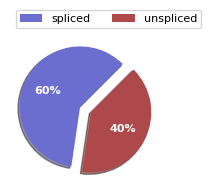

In [5]:
scv.pl.proportions(adata)

In [6]:
scv.pp.neighbors(adata)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
scv.tl.velocity_pseudotime(adata)
scv.tl.diffmap(adata)
scv.tl.umap(adata)

computing neighbors
    finished (0:00:17) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Filtered out 21927 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 1/40 cores)


  0%|          | 0/396 [00:00<?, ?gene/s]

    finished (0:06:28) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


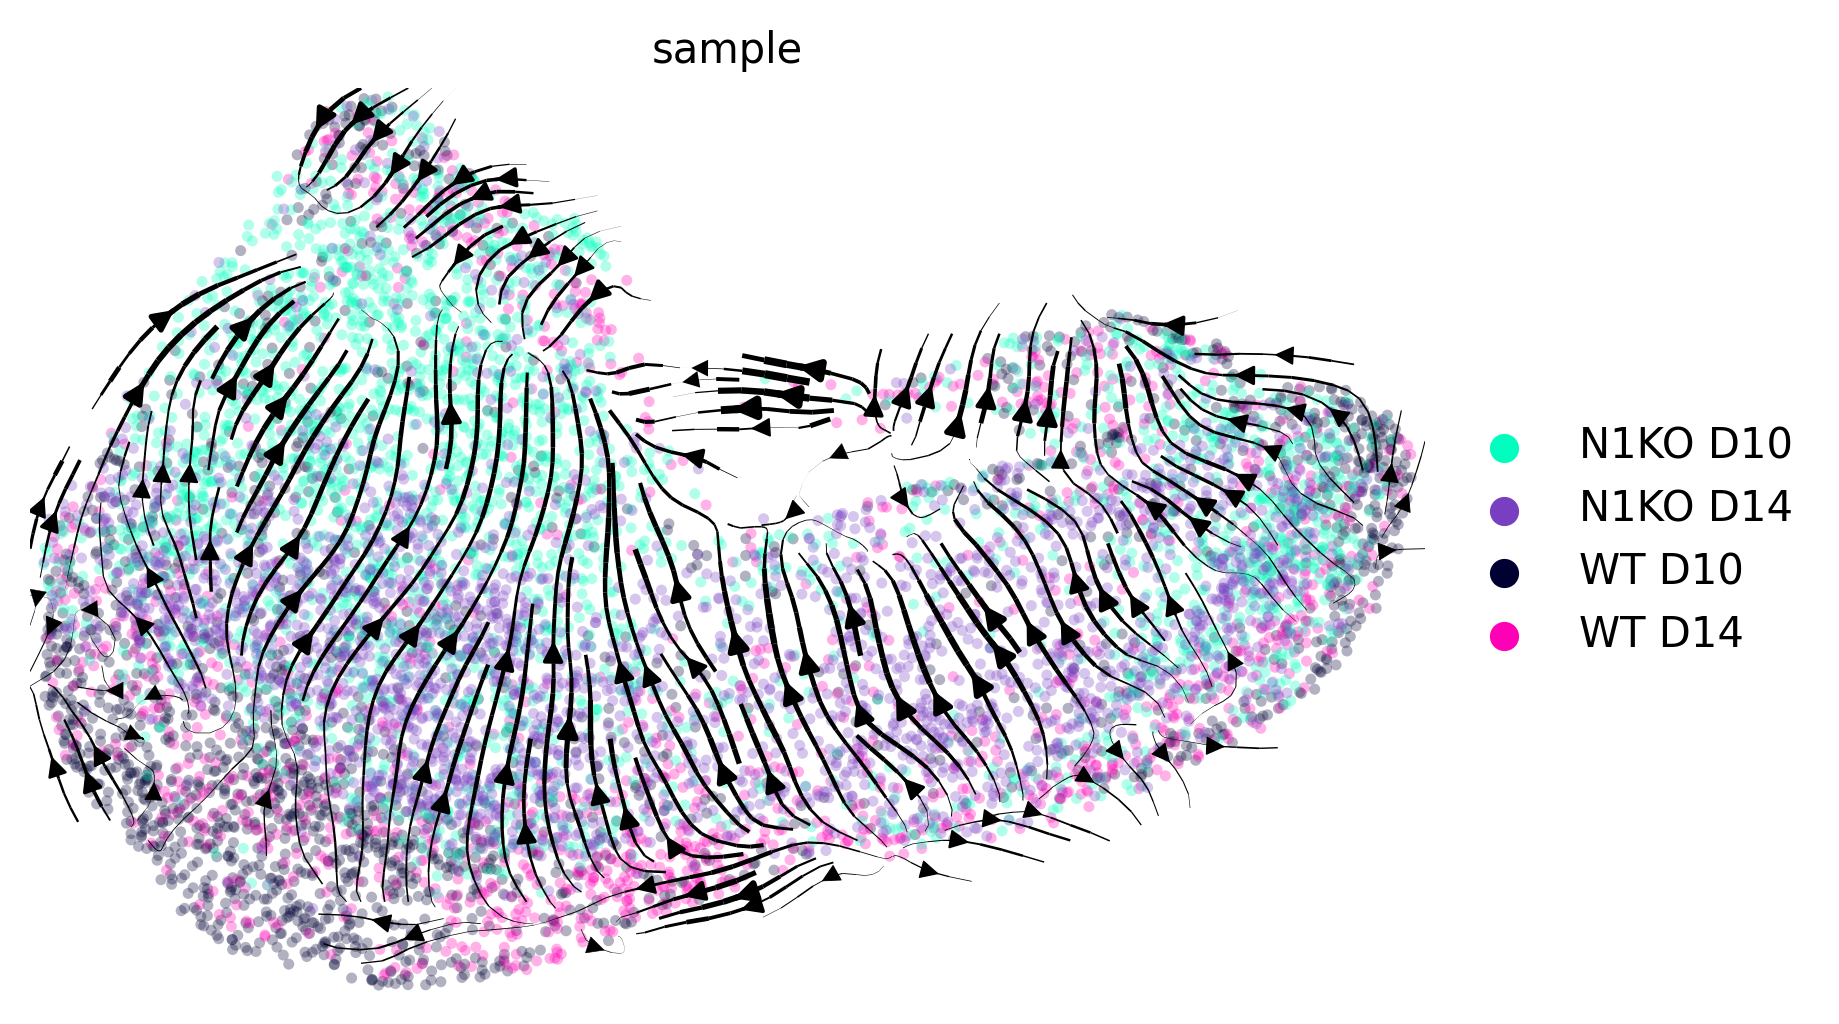

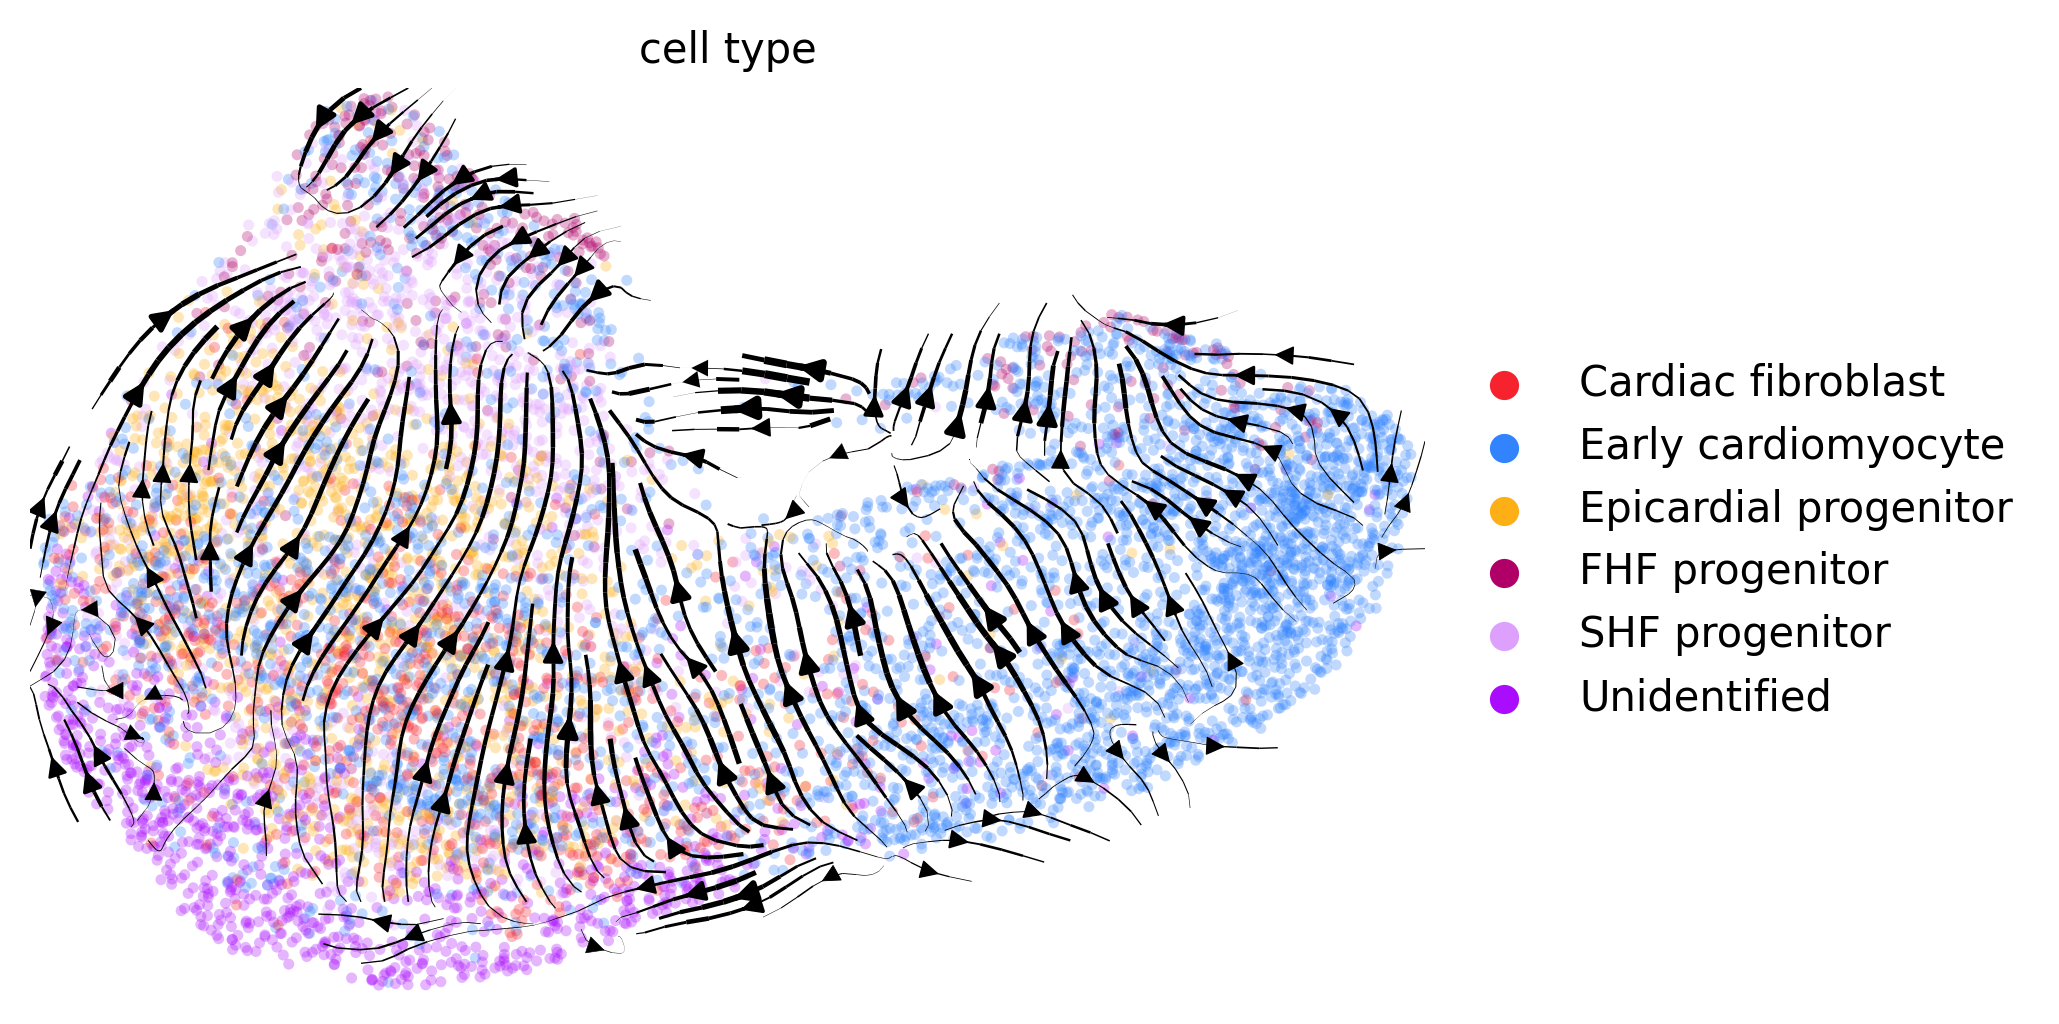

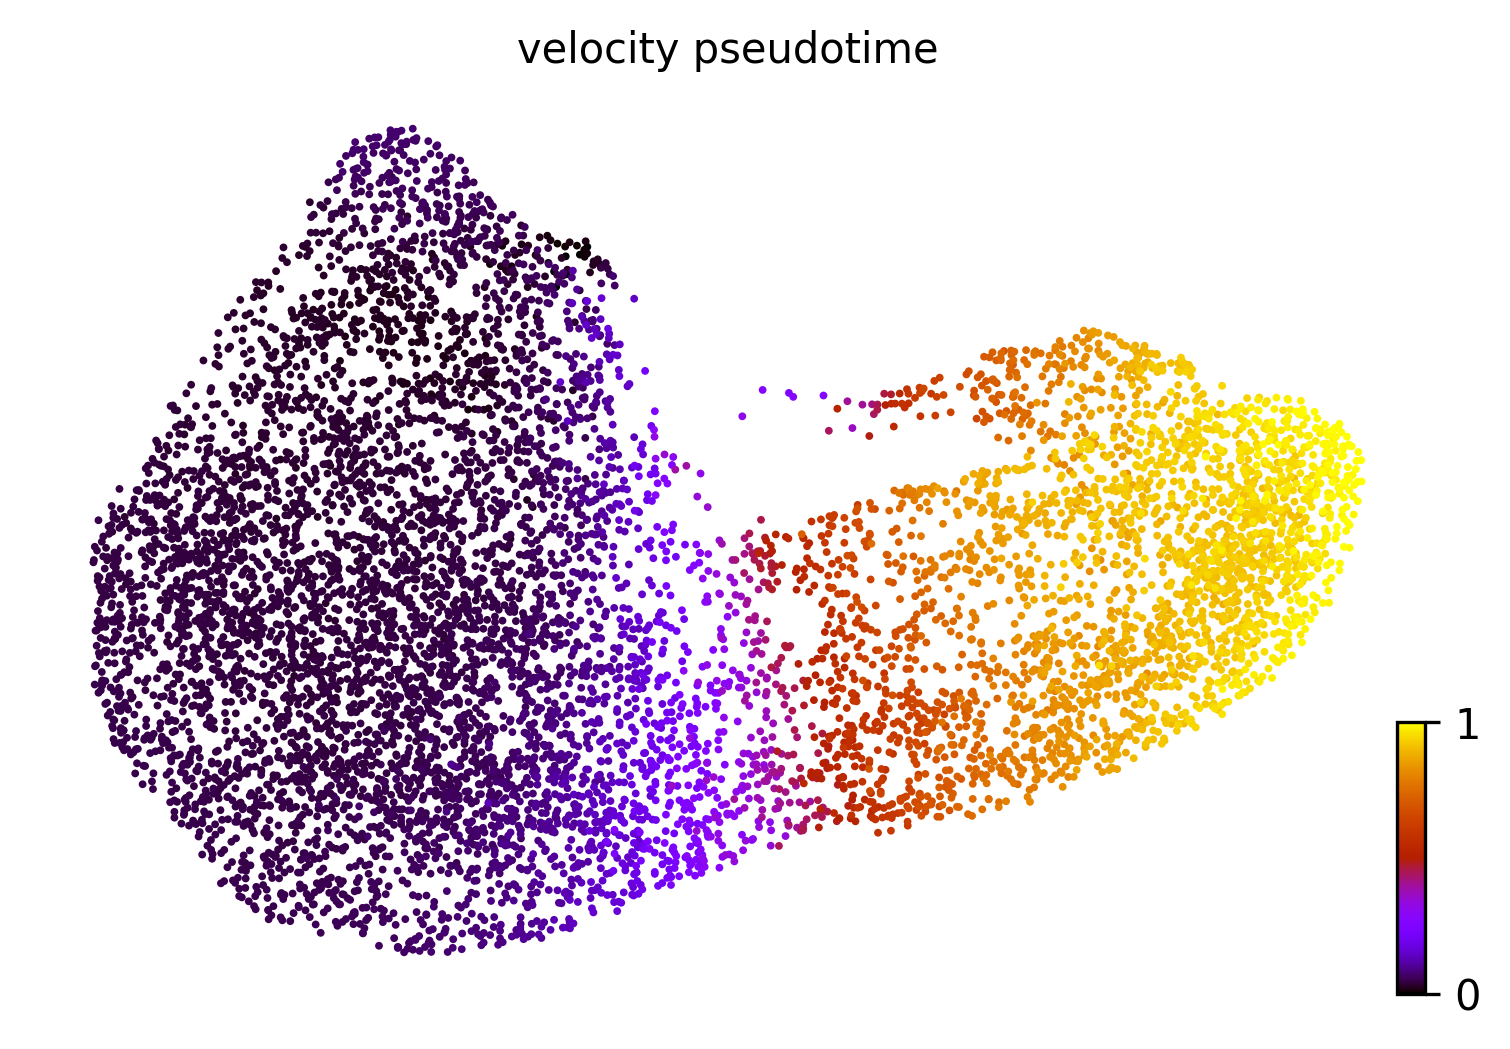

In [7]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="sample",palette=this_sample_color,size=28, dpi=300, legend_loc='right margin') 
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",palette=this_cell_type_color,size=28, dpi=300, legend_loc='right margin')
scv.pl.scatter(adata, basis='umap', color='velocity_pseudotime', cmap='gnuplot', dpi=300, size=14, legend_loc='right margin')

### Important genes from velocity

In [8]:
scv.tl.rank_velocity_genes(adata, groupby='cell_type', min_corr=.3)
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(30)

ranking velocity genes
    finished (0:00:04) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


Cardiac fibroblast Early cardiomyocyte Epicardial progenitor  \
0               ROBO2              TUBA1C                COL6A2   
1               PLCE1              NUSAP1                  CDK6   
2              COL6A3                 PBK                 PLCE1   
3               EDNRA                MYL4                  LIX1   
4                NFIA                ARSJ                 TECRL   
5              COL3A1               CKAP2                COL8A1   
6                HAS2               CCNB1                  HAS2   
7             SPATS2L              SLC2A3                 GAP43   
8                CDK6               LMNB1               ADAMTS5   
9                PRTG                ZIC2                 ROBO2   
10               LIX1               TACC3                COBLL1   
11             COL6A2                 FN1               SPATS2L   
12             IGFBP7                MYH6                  NFIA   
13              GAP43                 TNC                  PRTG   
14            ADAMTS5                  C7                 KIF11   
15             COBLL1                FHL2                 TERF1   
16              ZFHX4                MYL7                 TMOD1   
17             COL8A1               PODXL               CACNA1D   
18              TNNT2                NFIA                DIAPH3   
19             DIAPH3                SMC4                 ACTN2   
20              SULF1               TOP2A                 SFRP1   
21            COL11A1           ARHGAP11A                   FN1   
22              TGFBI              IGFBP2                  ISL1   
23              KIF11                SGO2                 RSPO3   
24               MSX2              KIF20B                COL6A3   
25               VCAN               MYLK3                  PRC1   
26             KIF18A                 EZR                COL3A1   
27               MYL4              COBLL1                HAPLN1   
28             FAM83D                VCAN                 RCSD1   
29             HAPLN1                CREM                 KIF4A   

   FHF progenitor SHF progenitor Unidentified  
0            TRDN          TECRL       CTNNA2  
1          CTNNA3        CACNA1D       ADGRV1  
2           MYOM1        CCDC141         MAP2  
3           MYOCD            TTN        SULF1  
4     PALM2-AKAP2          TMOD1       PTPRZ1  
5          SORBS2          TAFA4      COL11A1  
6           SMYD1         CTNNA3        EPHA7  
7           RCSD1           CDK6   AL358613.1  
8           ESRRG         LRRTM3        LMX1A  
9            DGKI          RCSD1        ZFHX4  
10         TRIM55         PDLIM5       APCDD1  
11            TTN          ESRRG       COL2A1  
12        CACNA1D          ACTN2        PDE1A  
13         PDLIM5          CMYA5      CYP26C1  
14          ALPK2           ISL1         ZIC1  
15         LRRTM3          SMYD1      RIPPLY3  
16         SLC8A1       PPP1R12B         PAX6  
17            DMD          MYOCD         CDH6  
18          CMYA5         ANGPT1        LYPD1  
19           PKIA          MEF2C         PRTG  
20          TMOD1           PKIA         NEBL  
21        CCDC141         TRIM55         MSX2  
22           CREM           TRDN        CENPK  
23          TAFA4    PALM2-AKAP2       FAM83D  
24         MYBPC3           LMO2      DEPDC1B  
25          RBM24         MYBPC3       TFAP2B  
26          CSRP3           PRTG      IGFBPL1  
27          MEF2C          RBM24        ERBB3  
28          MYLK3          MYOM1       GAS2L3  
29         ANGPT1          ALPK2      CNTNAP2